# カメラ撮影機能を使う（動画）

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [1]:
# 必要なモジュールを読み込む
from avfoundation.take_movie_withui import * 

# 一時保存するファイル名を指定する
path = "_take.MOV"
# 動画を撮影して・ファイル保存する
take_movie_and_save(path)

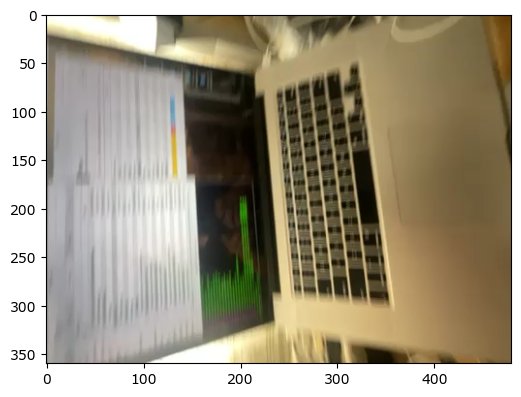

In [2]:
# OpenCVやmatplotlibを読み込む 
import cv2
import matplotlib.pyplot as plt

# OpenCV機能を使って動画ファイルを読み込む
cap = cv2.VideoCapture(path)
# 最初のフレームを読み込む
ret, frame = cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# matplotlibで冒頭フレーム画像を表示する
plt.figure(figsize=[6,6])
plt.imshow(frame)
plt.show()
# 動画ファイル読み込みを止める
cap.release()
#cv2.destroyAllWindows()

In [3]:
# 撮影・選択した動画を開く
cap = cv2.VideoCapture(path)

# 撮影・選択動画のサイズやフレームレートを取得する
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
# 動画保存用の「ビデオライター」を作る
codec = cv2.VideoWriter_fourcc(*'mp4v')
# 下記行が実行できるように、既存ファイルがあれば削除しておく
writer = cv2.VideoWriter('./monochrome.mp4', 
                         codec, fps, (width, height))
# 撮影・選択した動画の各フレームに対して画像処理を掛ける
while True:
    ret, frame = cap.read()
    if ret: # カラー画像をモノクロ画像に変換する
        mono_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        mono_img = cv2.cvtColor(mono_img, cv2.COLOR_GRAY2BGR)
        writer.write(mono_img) # 画像を1フレーム分として書き込み
    else:
        break

# 入出力ファイル双方を閉じる
writer.release()
cap.release()